# 📊 Statistics with Python

## 1.Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

np.random.seed(42)  # For reproducibility


## 2. Generate Example Data
We'll simulate exam scores of 100 students.  
In statistics, data often comes from sampling a larger population.  
Here, we assume scores follow a **Normal distribution** with **mean=70**, **std=10**.

In [2]:
scores = np.random.normal(loc=70, scale=10, size=100)
data = pd.DataFrame({"Scores": scores})


## 3. Descriptive Statistics
Descriptive statistics summarize data with simple numbers:
- **Mean**: the "average" value
- **Median**: the middle value, less sensitive to outliers
- **Standard deviation**: how spread out the data is
- **Min/Max**: range of the data
- **Percetiles**: P25, P75, etc

In [3]:
# Compute statistics
mean_val = data["Scores"].mean()
median_val = data["Scores"].median()
std_val = data["Scores"].std()
min_val = data["Scores"].min()
max_val = data["Scores"].max()
q1 = np.percentile(data["Scores"], 25)
q3 = np.percentile(data["Scores"], 75)

print("Mean:", mean_val)
print("Median:", median_val)
print("Standard Deviation:", std_val)
print("Min:", min_val)
print("Max:", max_val)
print("25th percentile (Q1):", q1)
print("75th percentile (Q3):", q3)

Mean: 68.96153482605907
Median: 68.73043708220288
Standard Deviation: 9.081684280078008
Min: 43.80254895910255
Max: 88.52278184508938
25th percentile (Q1): 63.99094329503547
75th percentile (Q3): 74.05952052012063


## 4. Visualization: Distribution
Visualizing the distribution shows how the data is spread.  
Many real-world variables (like exam scores) roughly follow a **bell-shaped Normal distribution**.

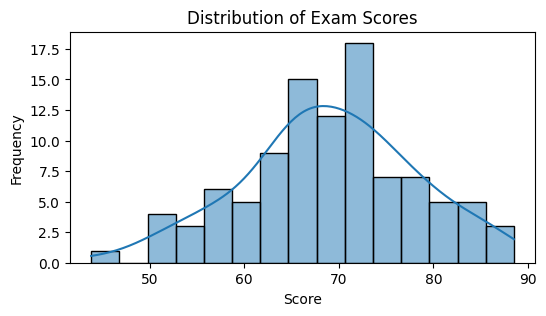

In [4]:
plt.figure(figsize=(6,3))
sns.histplot(data["Scores"], kde=True, bins=15)
plt.title("Distribution of Exam Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

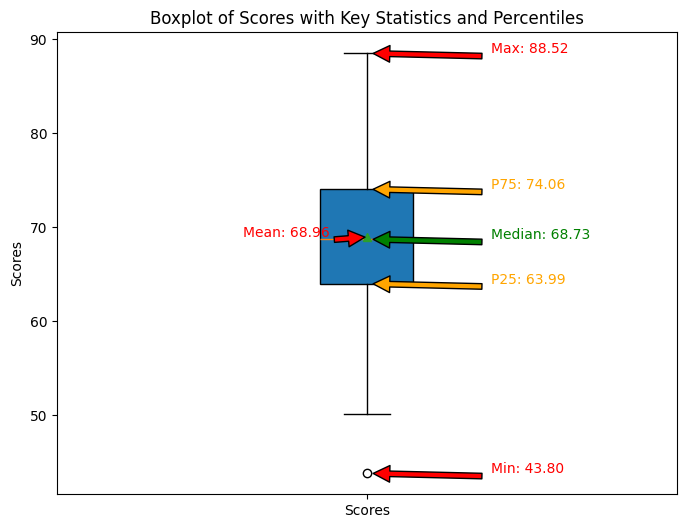

In [5]:
# Create boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(data["Scores"], vert=True, patch_artist=True, showmeans=True)

# Annotate statistics
# Right side annotations
plt.annotate(f'Min: {min_val:.2f}', xy=(1, min_val), xytext=(1.2, min_val),
             arrowprops=dict(facecolor='red', shrink=0.05), color='red')
plt.annotate(f'P25: {q1:.2f}', xy=(1, q1), xytext=(1.2, q1),
             arrowprops=dict(facecolor='orange', shrink=0.05), color='orange')
plt.annotate(f'Median: {median_val:.2f}', xy=(1, median_val), xytext=(1.2, median_val),
             arrowprops=dict(facecolor='green', shrink=0.05), color='green')
plt.annotate(f'P75: {q3:.2f}', xy=(1, q3), xytext=(1.2, q3),
             arrowprops=dict(facecolor='orange', shrink=0.05), color='orange')
plt.annotate(f'Max: {max_val:.2f}', xy=(1, max_val), xytext=(1.2, max_val),
             arrowprops=dict(facecolor='red', shrink=0.05), color='red')

# Left side annotation for Mean
plt.annotate(f'Mean: {mean_val:.2f}', xy=(1, mean_val), xytext=(0.8, mean_val),
             arrowprops=dict(facecolor='red', shrink=0.05), color='red')

plt.title("Boxplot of Scores with Key Statistics and Percentiles")
plt.ylabel("Scores")
plt.xticks([1], ["Scores"])
plt.show()


## 5. Probabilities
Probability is about the likelihood of an event.  
Example: What's the chance a student scores above 80?

In [6]:
prob_above_80 = np.mean(data["Scores"] > 80)
print("Probability of scoring above 80:", prob_above_80)


Probability of scoring above 80: 0.11



## 6. Correlation Example
Correlation measures the strength and direction of a relationship between two variables.  
Let's simulate hours studied vs. exam scores.

Correlation between hours studied and scores:
           Hours    Scores
Hours   1.000000  0.898763
Scores  0.898763  1.000000






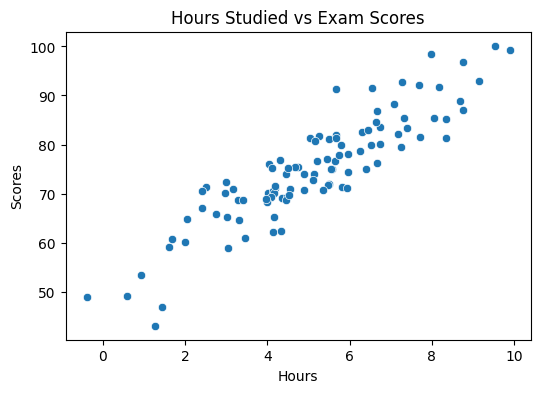

In [14]:
hours = np.random.normal(5, 2, 100)
scores = 50 + 5*hours + np.random.normal(0, 5, 100)
exam_data = pd.DataFrame({"Hours": hours, "Scores": scores})

print("=" * 50)
print("Correlation between hours studied and scores:")
print(exam_data.corr())  # Positive correlation means: more hours, higher scores.
print("=" * 50)
print("\n" * 3)

plt.figure(figsize=(6,4))
sns.scatterplot(x="Hours", y="Scores", data=exam_data)
plt.title("Hours Studied vs Exam Scores")
plt.show()


## 7. Sampling
In statistics, we rarely measure the whole population. Instead, we take samples.  
Here we randomly sample **10 students**.

In [8]:
sample = exam_data.sample(10)
print("Random Sample of Data:")
print(sample)


Random Sample of Data:
        Hours      Scores
77   7.907068   86.534256
71   3.368379   59.662586
92   5.428187   74.194114
91   6.712798   81.098983
20   6.582064   94.483612
83   5.964945   73.635647
55   3.571297   65.435315
93   2.508522   66.790623
32   2.875393   64.604822
79  10.440338  100.275124


## 8. Hypothesis Testing: 
### 8.1 One-Sample t-test
Hypothesis testing helps us decide if a result is statistically significant.  
Example: Is the average exam score **significantly different from 70**?

In [9]:
t_stat, p_val = stats.ttest_1samp(exam_data["Scores"], 70)
print("One-sample t-test: t=", t_stat, " p=", p_val)


One-sample t-test: t= 5.13853159023475  p= 1.3928902133352692e-06


### 8.2 A/B Testing (Two-Sample t-test)
A/B testing compares two groups (e.g., old method vs. new method).  
Here, compare two groups of students taught with different methods.

In [10]:
groupA = np.random.normal(72, 10, 50) # params: mean, standard deviation, size
groupB = np.random.normal(75, 10, 50)
t_stat, p_val = stats.ttest_ind(groupA, groupB)
print("Two-sample t-test (A/B test): t=", t_stat, " p=", p_val)


Two-sample t-test (A/B test): t= -0.98401694063609  p= 0.3275303594554878


## 10. Chi-Square Test (Categorical Data)
Chi-square tests if two categorical variables are independent.  
Example: Gender vs. Pass/Fail.

In [11]:
obs = np.array([[30, 10], [25, 15]])  # [Male:Pass/Fail, Female:Pass/Fail]
chi2, p, dof, exp = stats.chi2_contingency(obs)
print("Chi-square test: chi2=", chi2, " p=", p)


Chi-square test: chi2= 0.9309090909090909  p= 0.3346268097478841


## 11. ANOVA (Analysis of Variance)
ANOVA compares **means of 3+ groups**.  
Example: Do three teaching methods produce different results?

In [12]:
group1 = np.random.normal(70, 8, 30) # params: mean, standard deviation, size
group2 = np.random.normal(75, 8, 30)
group3 = np.random.normal(80, 8, 30)
f_stat, p_val = stats.f_oneway(group1, group2, group3)
print("ANOVA test: F=", f_stat, " p=", p_val)


ANOVA test: F= 5.975434150173776  p= 0.0037011311506518095


## 12. Regression Analysis
Regression predicts one variable based on another.  
Example: Predict exam score from hours studied.

Regression Coefficient (slope): 4.895877982103725
Intercept: 50.849736152207576


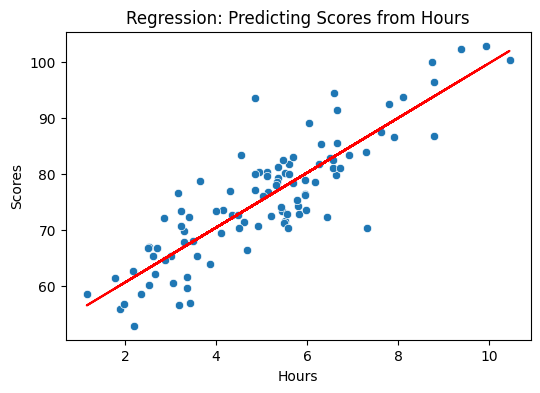

In [13]:

from sklearn.linear_model import LinearRegression

X = exam_data[["Hours"]]
y = exam_data["Scores"]
model = LinearRegression()
model.fit(X, y)

print("Regression Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)

plt.figure(figsize=(6,4))
sns.scatterplot(x="Hours", y="Scores", data=exam_data)
plt.plot(exam_data["Hours"], model.predict(X), color="red")
plt.title("Regression: Predicting Scores from Hours")
plt.show()


## 13. Conclusion
We quickly saw:
- Descriptive stats: mean, median, standard deviation, percentiles
- Correlation between variables
- Sampling from data
- Hypothesis testing (t-tests)
- A/B testing
- Chi-square test for categorical data
- ANOVA for multiple groups
- Regression for prediction

